<a href="https://colab.research.google.com/github/imfreeman1/StartGitHubDeskTop/blob/main/%5BE_03%5DSticker_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [294]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import math

print("🌫🛸")

🌫🛸


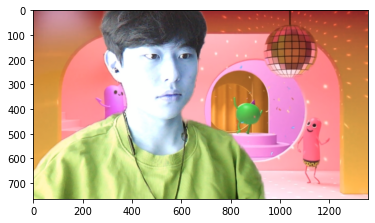

In [295]:
my_image_path = 'C:/DB/image/image2.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

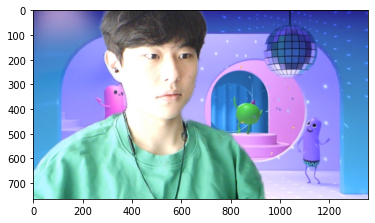

In [296]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [297]:
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [298]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(384, 99) (705, 420)]]


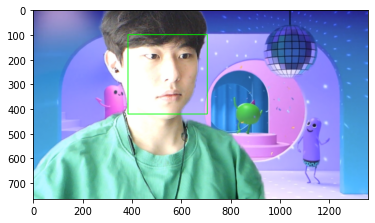

In [299]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [300]:
model_path = 'C:/DB/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [301]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)


print(list_landmarks)
print(type(list_landmarks))
print("Shape of listb is : ", np.shape(list_landmarks))

[[(368, 165), (371, 214), (376, 263), (389, 309), (411, 348), (441, 383), (477, 411), (514, 431), (550, 438), (581, 429), (604, 403), (623, 372), (641, 338), (654, 301), (664, 263), (669, 222), (667, 184), (433, 148), (456, 134), (484, 131), (513, 135), (538, 146), (591, 149), (611, 141), (633, 140), (652, 145), (664, 159), (563, 189), (567, 214), (572, 240), (577, 266), (537, 290), (552, 294), (566, 297), (578, 294), (589, 288), (461, 185), (479, 180), (500, 181), (516, 192), (498, 198), (478, 198), (590, 194), (607, 183), (625, 183), (639, 190), (627, 198), (609, 198), (510, 350), (534, 338), (554, 328), (565, 332), (575, 327), (587, 336), (596, 345), (587, 360), (576, 368), (564, 370), (552, 369), (533, 362), (522, 349), (553, 344), (564, 344), (574, 342), (590, 344), (575, 346), (565, 348), (554, 347)]]
<class 'list'>
Shape of listb is :  (1, 68, 2)


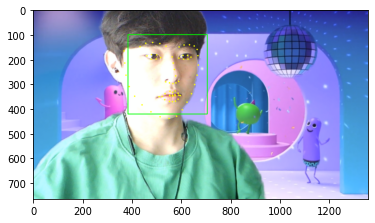

In [302]:
for landmark in list_landmarks:
    for point in landmark:
            cv2.circle(img_show, point, 3, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [303]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[9]) # 코의 index는 30 입니다
    x = landmark[10][0]
    y = landmark[10][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    print(np.shape(landmark))

(581, 429)
(x,y) : (604,242)
(w,h) : (322,322)
(68, 2)


(200, 200, 3)


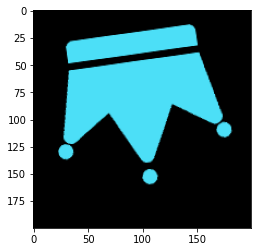

In [304]:
sticker_path = 'C:/DB/image/king.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, dsize=(200,200))
img_rotate = cv2.rotate(img_sticker, cv2.ROTATE_180)
cp = (img_rotate.shape[1] / 2, img_rotate.shape[0] / 2) # 영상의 가로 1/2, 세로 1/2
rot = cv2.getRotationMatrix2D(cp, 8, 0.8) # 20도 회전, 스케일 0.8배


dst = cv2.warpAffine(img_rotate, rot, (200, 200))
print (img_sticker.shape)
plt.imshow(dst)
plt.show()


In [305]:
refined_x = (x - w // 2)+30
refined_y = y + 130
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (473,372)


In [306]:
if refined_x < 0: 
    dst = dst[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    dst = dst[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (473,372)


In [307]:
sticker_area = img_show[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]
img_show[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(dst==0,sticker_area,dst).astype(np.uint8)


print("슝~")

슝~


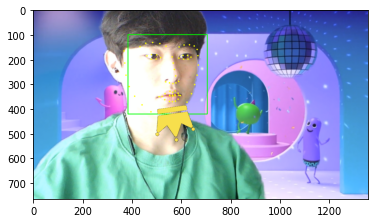

In [308]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

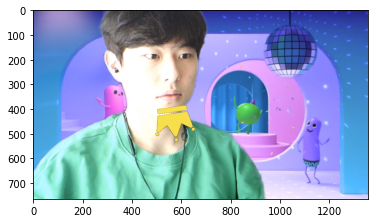

In [309]:
sticker_area = img_bgr[refined_y:refined_y +dst.shape[0], refined_x:refined_x+dst.shape[1]]
img_bgr[refined_y:refined_y +dst.shape[0], refined_x:refined_x+dst.shape[1]] = \
    np.where(dst==0,sticker_area,dst).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()